<a href="https://colab.research.google.com/github/titulacion2021/Image-Classification-ResNet/blob/main/COVID_19_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#General libraries
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os
import numpy as np

from tensorflow.keras import layers
from sklearn.metrics import classification_report,confusion_matrix

#Skimage
import skimage.io as io
from skimage.transform import  rescale,resize
from skimage import exposure
from skimage.util import img_as_uint,img_as_ubyte
from skimage.color import rgb2gray

#Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


#Bayesian Optimization
!pip install bayesian-optimization
!pip install gpy
!pip install gpyopt
import GPy, GPyOpt

%matplotlib inline

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=05280bd3863c6f447592c312e3eed8332974de6b580d4be2b54bb8fd77cc10a9
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization
     |████████████████████████████████| 962kB 12.5MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2564978 sha256=0a54d1af566de681df0529820a112a591864e010e6e71fc95d3089c900fad88b
  Stored in directory: /root/.cache/pip/wheels/23/99/8d/d0c3dee7db4af58190cde6abdb45e6a7ded2f9f01ff528dd0f
  Created wheel for paramz: filename=paramz-0.9.5-cp37-none-any.whl size=102552 sha256=c2c850551f532eaa73b76d07ed6d066c049bb9842b1eb999c3b6f8d19cbf9bb6
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built gpy paramz
     |█

# **Loading Data**

In [4]:
#Google Drive Permissions
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#==================================
#LOADING PROCESSED TRAINING DATA 
#==================================

labels = ['Covid', 'Normal','Pneumonia']
img_size = 224  
def get_data(data_dir): 
    data = [] 
    for label in labels: 
        path = os.path.join('/content/drive/MyDrive/Data/Processeddata/Trainingset', label) #YOUR DATA PATH
        class_num = labels.index(label)
        for img in os.listdir(path): 
            try:
                img_arr = io.imread(os.path.join(path, img))
                img_gray = rgb2gray(img_arr) 
                data.append([img_gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
#==================================
#LOADING PROCESSED VALIDATION DATA 
#==================================

labels = ['Covid', 'Normal','Pneumonia']
img_size = 224  
def get_dataval(data_dir): 
    data = [] 
    for label in labels: 
        path = os.path.join('/content/drive/MyDrive/Data/Processeddata/Validationset', label) #YOUR DATA PATH
        class_num = labels.index(label)
        for img in os.listdir(path): 
            try:
                img_arr = io.imread(os.path.join(path, img))
                img_gray = rgb2gray(img_arr) 
                data.append([img_gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [7]:
#==================================
#LOADING PROCESSED TEST DATA
#==================================
labels = ['Covid', 'Normal','Pneumonia']
img_size = 224  #Por definir 
def get_datatest(data_dir): 
    data = [] 
    for label in labels: 
        path = os.path.join('/content/drive/MyDrive/Data/Processeddata/TestSet', label) #YOUR DATA PATH
        class_num = labels.index(label)
        for img in os.listdir(path): 
            try:
                img_arr = io.imread(os.path.join(path, img))
                img_gray = rgb2gray(img_arr) 
                data.append([img_gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
#Training set loading
train= get_data('/content/drive/MyDrive/Data/Processeddata/Trainingset') #Tomamos nuestro set de entrenamiento del directorio

In [9]:
#Validation set loading
val= get_dataval('/content/drive/MyDrive/Data/Processeddata/Validationset')

In [10]:
#Test set loading
test= get_datatest('/content/drive/MyDrive/Data/Processeddata/TestSet')

# Exploratory Data Analisys



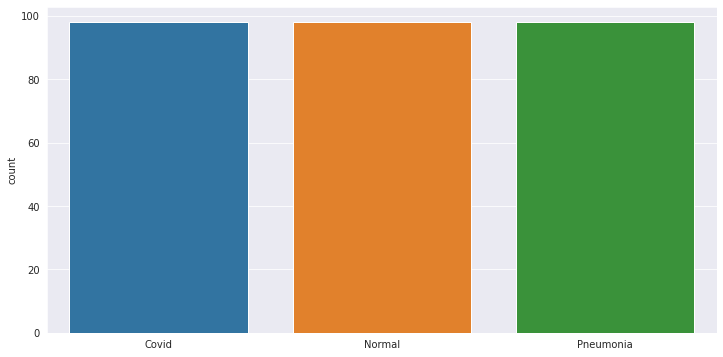

In [10]:
#==================================
#SETS VISUALISATION
#==================================
l=[]
for i in train:  #train, val or test
  if (i[1]==0):
    l.append("Covid")
  
  elif (i[1]==1):
    l.append("Normal")
  else:
    l.append("Pneumonia")

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(l)

Found 294 files belonging to 3 classes.


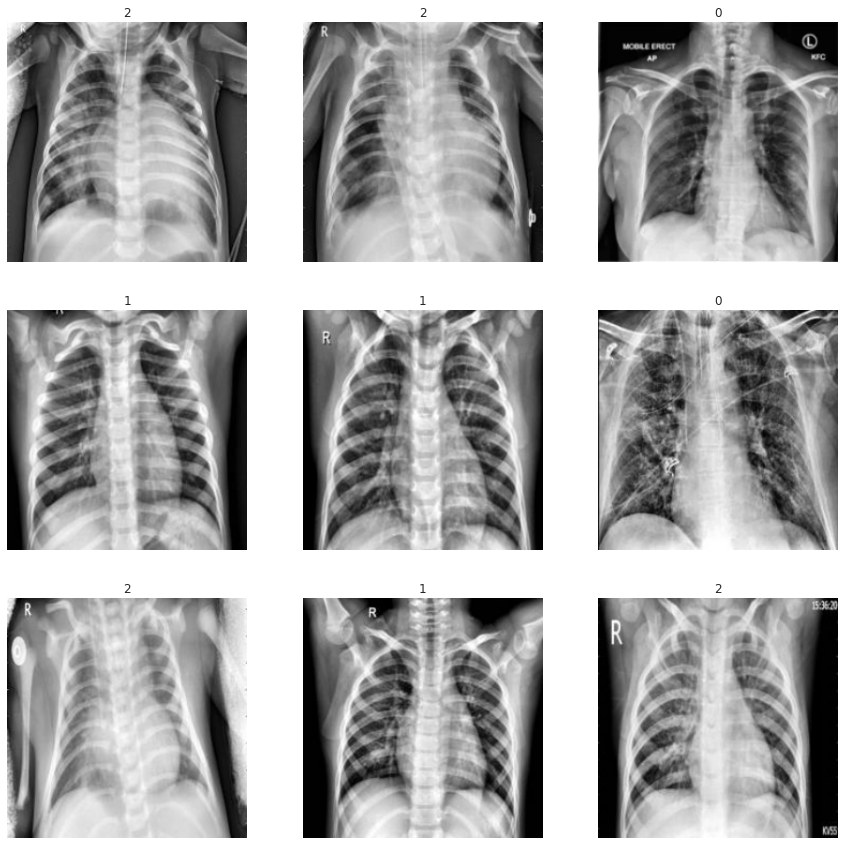

In [ ]:
#==================================================
#IMAGES AND THEIR LABELS IN THE TRAINING DATA SET
#==================================================

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Data/Processeddata/Trainingset")
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

#0 -> Covid
#1 -> Normal 
#2 -> Pneumonia

Text(0.5, 0.9, 'Covid (class = 0)')

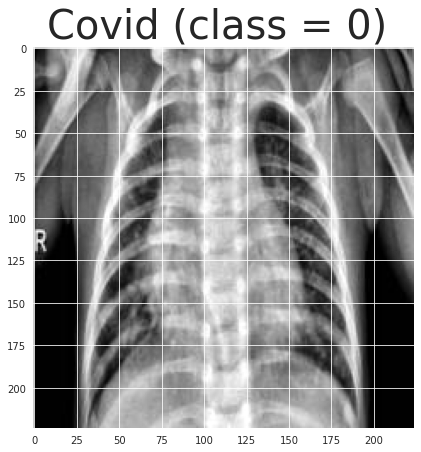

In [ ]:
#==================================================
#INVIDUAL LABEL VISUALIZATION
#==================================================

plt.figure(figsize = (7,7))
plt.imshow(train[250][0],cmap=plt.cm.gray)
plt.figtext(.5,.9,'Covid (class = 0)', fontsize=40, ha='center')

#Arrays Creation

*   x train, y train
*   x val, y val
*   x test, y test

In [11]:
x_train = [] #Samples
y_train = [] #Labels

x_val = []  #Samples
y_val = [] #Labels

x_test = []  #Samples
y_test = [] #Labels


#TRAINING SET SAMPLES AND LABELS CREATON
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)


#VALIDATION SET SAMPLES AND LABELS CREATION
for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

#TEST SET SAMPLES AND LABELS CREATION
for feature, label in test:
  x_test.append(feature)
  y_test.append(label)


# NORMALIZATION
x_train_normalized = np.array(x_train)/ 255
x_val = np.array(x_val) / 255
x_test= np.array(x_test)/255

#LABELS OF EACH SET 
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test= np.array(y_test)

# PCA (Principal Component Analisys)
Dimensionally reduced images to be used for the Bayesian Hyperparameter optimizacion process

In [12]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
#HELPFUL RESOURCES: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

shape = x_train_normalized.shape
img_r = x_train_normalized.reshape((shape[0], shape[1] * shape[2])) #input 3D -> 2D reshape
X = img_r
pca = RandomizedPCA(150,copy=True, whiten=False, svd_solver='full', tol=0.0, iterated_power='auto', random_state=None)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

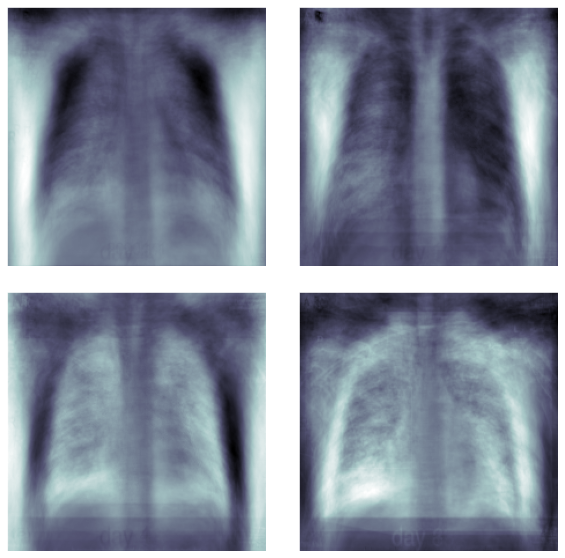

In [13]:
#======================
#CXR EIGENVECTORS PLOT 
#======================
fig, axes = plt.subplots(2, 2, figsize=(10,10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(224, 224), cmap='bone')

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Text major ticklabel objects>)

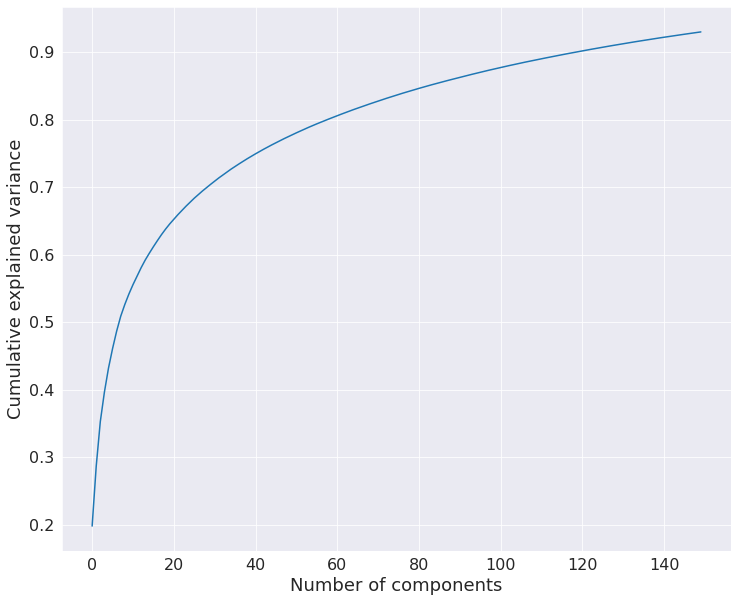

In [14]:
#=========================
#PRINCIPAL COMPONENTS PLOT 
#=========================

plt.figure(figsize=(12, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components',fontsize=18)
plt.ylabel('Cumulative explained variance',fontsize=18);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Around 150 components explain 95% percent of each image variance

In [15]:
#================================
#COMPUTE THE NUMBER OF COMPONENTS
#================================

pca = RandomizedPCA(0.95).fit(X) #95%
components = pca.transform(X)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

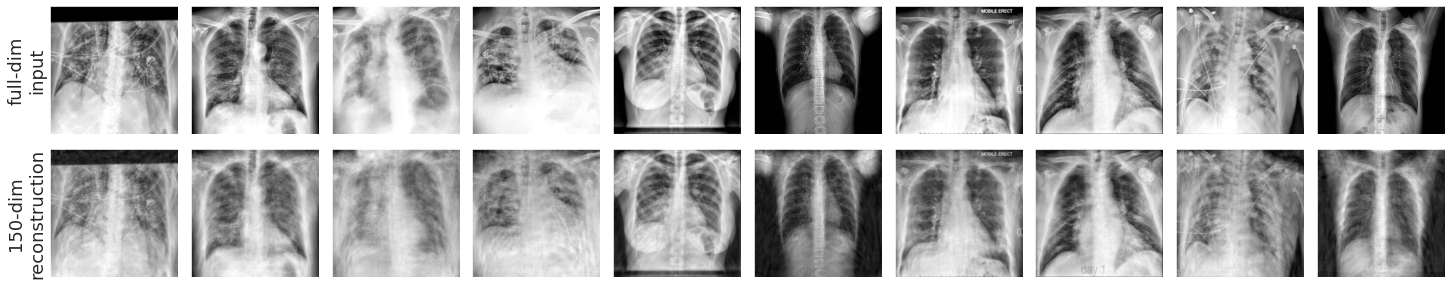

In [16]:
#=======================================
#DIMENSIONAL RECONSTRUCTED OUTPUT PLOT
#=======================================
fig, ax = plt.subplots(2, 10, figsize=(25, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(224,224), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(224, 224), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput', fontsize=18)
ax[1, 0].set_ylabel('150-dim\nreconstruction',fontsize=18)

A comparison between the full dimensional input and the 150 dimensional reconstructed output

# Bayesian Optimization (Small Bounds)



> Bounds:
*   Rotation: 0 degrees – 90 degrees
*   Zoom: 0.0 – 0.5    
*   Width shift: 0.0 – 0.5 
*   Height Shift: 0.0 - 0.5 
*   Horizontal Flip: True (1) – False (0)
*   Vertical Flip: True (1) - False (0) 
*   Learning Rate: 3e-4 – 1e-5 
*   Batch Size: 1,2 and 3 
*   Kernel Size: 1,3 and 5 
*   Epochs: 200-300 

Minimized loss: 0.1504152715206146 



In [15]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from keras.layers import Activation, Dropout, BatchNormalization, Dense
from keras.metrics import categorical_crossentropy
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import pandas as pds
import random
import time

In [ ]:
#HELPFUL RESOURCES:
#https://towardsdatascience.com/bayesian-hyper-parameter-optimization-neural-networks-tensorflow-facies-prediction-example-f9c48d21f795
#https://github.com/shibuiwilliam/keras_gpyopt/blob/master/bopt_nn.ipynb
#https://github.com/toantm/keras-bda/blob/master/da_lenet5_mnist.py
#https://www.blopig.com/blog/wp-content/uploads/2019/10/GPyOpt-Tutorial1.html
#https://nanonets.com/blog/hyperparameter-optimization/ Optimizacion de hiperparametros 
trainingsetDA= np.reshape(projected, (294, 224, 224,1)) #Input reshape 2D -> 3D

In [ ]:
#======================================================
#Batch Normalization layers & ReLU activaction function
#======================================================

def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn


#==================
#RESIDUAL BLOCKS
#==================

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2), 
               filters=filters,
               padding="same")(x) 
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out


In [ ]:

class RESNET(): 
#======================================================
#DATA AUGMENTATION OPERATIONS AND MODEL HYPERPARAMETERS
#======================================================
    def __init__(self,
                adam_lr=1e-4,
                rotation_range = 90,  
                zoom_range = 0.5, 
                width_shift_range=0.5, 
                height_shift_range=0.5,  
                horizontal_flip = True, 
                vertical_flip=False,
                batch_size=1, 
                epochs=250,
                kernel_size=3):

        self.adam_lr = adam_lr #learning rate
        self.rotation_range = rotation_range 
        self.zoom_range = zoom_range
        self.width_shift_range=width_shift_range 
        self.height_shift_range=height_shift_range
        self.horizontal_flip = horizontal_flip
        self.vertical_flip= vertical_flip  
        self.batch_size = batch_size
        self.epochs = epochs
        self.kernel_size = kernel_size
        self.__datagen = self.data_augmentation()
        self.__model = self.resnet_model()
        

   
  
    def residual_block(self, x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: #Tamano del filtro 3x3
        y = Conv2D(kernel_size=kernel_size,
                   strides= (1 if not downsample else 2), 
                   filters=filters,
                   padding="same")(x)
        y = relu_bn(y)
        y = Conv2D(kernel_size=self.kernel_size,
                   strides=1,
                   filters=filters,
                   padding="same")(y)
                   
        if downsample:
            x = Conv2D(kernel_size=self.kernel_size,
                     strides=2,
                     filters=filters,
                     padding="same")(x)
        out = Add()([x, y])
        out = relu_bn(out)
        return out

#=================
#ResNet Model def
#=================

    def resnet_model(self):
        inputs = Input(shape=(224,224, 1))
        num_filters = 64 
        t = BatchNormalization()(inputs)
        t = Conv2D(kernel_size= self.kernel_size , strides= 1, filters=num_filters, padding="same")(t)
        t = relu_bn(t)
        num_blocks_list = [2, 5, 5, 2] #14 residual blocks
        for i in range(len(num_blocks_list)):
          num_blocks = num_blocks_list[i]
          for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
        t = AveragePooling2D(4)(t)
        t = Flatten()(t)
        outputs = Dense(3, activation='softmax')(t)
    
        model = Model(inputs, outputs)

        model.compile(optimizer=Adam(learning_rate=self.adam_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def data_augmentation(self):
        datagen = ImageDataGenerator(
        rotation_range =self.rotation_range,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = self.zoom_range, # Randomly zoom image 
        width_shift_range= self.width_shift_range,  # randomly shift images horizontally (fraction of total width)
        height_shift_range= self.height_shift_range,  # randomly shift images vertically (fraction of total height)
        horizontal_flip =self.horizontal_flip,  # randomly flip images
        vertical_flip=self.vertical_flip)  # randomly flip images
        datagen.fit(trainingsetDA)
        return datagen

#=================
#ResNet Model fit
#=================
    def resnet_fit(self):
        history = self.__model.fit(self.__datagen.flow(trainingsetDA,y_train, batch_size=self.batch_size),
                            epochs=self.epochs,verbose=1, validation_data=(x_val, y_val),
                            callbacks=[])
#===============================
#ResNet Model metrics evaluation
#===============================
    def resnet_evaluate(self):
        self.resnet_fit()
        evaluation = self.__model.evaluate(x_val,y_val, batch_size=self.batch_size, verbose=0)
        return evaluation



In [ ]:
#===============================
#Running ResNet Class
#===============================
def run_RESNET (adam_lr=3e-4,
                rotation_range = 90,  # randomly rotate images in the range (degrees, 0 to 180)
                zoom_range = 0.5, # Randomly zoom image 
                width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
                height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
                horizontal_flip = True,  # randomly flip images
                vertical_flip=False, # randomly flip images
                batch_size=1, 
                epochs=250,
                kernel_size=3):
               
    _resnet = RESNET(adam_lr = adam_lr,
                     rotation_range = rotation_range,  
                     zoom_range = zoom_range,  
                     width_shift_range=width_shift_range,  
                     height_shift_range=height_shift_range,  
                     horizontal_flip = horizontal_flip,  
                     vertical_flip= vertical_flip,
                     batch_size = batch_size,
                     epochs = epochs,
                     kernel_size = kernel_size)
    resnet_evaluation = _resnet.resnet_evaluate()
    return resnet_evaluation

In [ ]:
#===============================
#EXPERIMENT BOUNDS (SMALL)
#===============================
bounds = [{'name': 'adam_lr',    'type': 'continuous',    'domain': (3e-4, 1e-5)},    
          {'name': 'rotation_range',                         'type': 'continuous',    'domain': (0, 90)}, 
          {'name': 'zoom_range',                             'type': 'continuous',    'domain': (0.0,0.5)}, 
          {'name': 'width_shift_range',                      'type': 'continuous',    'domain': (0.0,0.5)},
          {'name': 'height_shift_range',                     'type': 'continuous',    'domain': (0.0,0.5)},
          {'name': 'horizontal_flip',                        'type': 'categorical',   'domain': (True, False)},
          {'name': 'vertical_flip',                          'type': 'categorical',   'domain': (True, False)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (1, 2, 3)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (200,250)}, 
          {'name': 'kernel',           'type': 'discrete',    'domain': (1,3,5)}]


In [ ]:
#===============================
#STATING BOUNDS DTYPES
#===============================
def f(x):
    print(x)
    evaluation = run_RESNET(
        adam_lr = float(x[:,0]),
        rotation_range = int(x[:,1]),
        zoom_range = float(x[:,2]),
        width_shift_range = float(x[:,3]),
        height_shift_range = float(x[:,4]),
        horizontal_flip = int(x[:,5]),
        vertical_flip = int(x[:,6]),
        batch_size = int(x[:,7]), 
        epochs = int(x[:,8]), 
        kernel_size = int(x[:,9]),
        )
    
    print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0], evaluation[1])) #METRICS PRINT
    print(evaluation)
    return evaluation[0]

In [ ]:
#===============================
#MODEL INITIAL POINTS
#===============================
inicio = time.time()
opt_resnet = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata= 20, Initial_design_numdata='latin')


#===============================
#MODEL OPTIMIZER
#===============================
BayesianOpt = opt_resnet.run_optimization(max_iter=150)
opt_resnet.save_evaluations("ev_file")

#===============================
#PRINTING RESULTS
#===============================
print("""
Optimized Parameters:
\t{0}:\t{1}
\t{2}:\t{3}
\t{4}:\t{5}
\t{6}:\t{7}
\t{8}:\t{9}
\t{10}:\t{11}
\t{12}:\t{13}
\t{14}:\t{15}
\t{16}:\t{17}
\t{18}:\t{19}
""".format(bounds[0]["name"],opt_resnet.x_opt[0],
           bounds[1]["name"],opt_resnet.x_opt[1],
           bounds[2]["name"],opt_resnet.x_opt[2],
           bounds[3]["name"],opt_resnet.x_opt[3],
           bounds[4]["name"],opt_resnet.x_opt[4],
           bounds[5]["name"],opt_resnet.x_opt[5],
           bounds[6]["name"],opt_resnet.x_opt[6],
           bounds[7]["name"],opt_resnet.x_opt[7],
           bounds[8]["name"],opt_resnet.x_opt[8],
           bounds[9]["name"],opt_resnet.x_opt[9]))
print("optimized loss: {0}".format(opt_resnet.fx_opt))

fin = time.time()
print(fin-inicio)

Streaming output truncated to the last 5000 lines.
147/147 [==============================] - 7s 46ms/step - loss: 0.8677 - accuracy: 0.5554 - val_loss: 0.6543 - val_accuracy: 0.7302
Epoch 30/300
147/147 [==============================] - 7s 46ms/step - loss: 0.9827 - accuracy: 0.5533 - val_loss: 0.8031 - val_accuracy: 0.6349
Epoch 31/300
147/147 [==============================] - 7s 46ms/step - loss: 0.8928 - accuracy: 0.6142 - val_loss: 0.8262 - val_accuracy: 0.6508
Epoch 32/300
147/147 [==============================] - 7s 46ms/step - loss: 0.9517 - accuracy: 0.5765 - val_loss: 0.7507 - val_accuracy: 0.6825
Epoch 33/300
147/147 [==============================] - 7s 46ms/step - loss: 0.8863 - accuracy: 0.5643 - val_loss: 0.8148 - val_accuracy: 0.6349
Epoch 34/300
147/147 [==============================] - 7s 46ms/step - loss: 0.8189 - accuracy: 0.6107 - val_loss: 0.7786 - val_accuracy: 0.6190
Epoch 35/300
147/147 [==============================] - 7s 46ms/step - loss: 0.8760 - accura

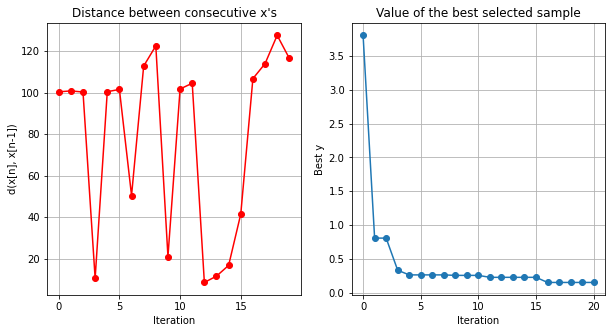

In [ ]:
#===============================
#CONVERGENCE PLOTS (ITERATIONS)
#===============================
opt_resnet.plot_convergence(BayesianOpt)
#37188.733

# Bayesian Optimization (Large Bounds)
> Bounds:
*   Rotation: 0 degrees – 359 degrees 
*   Zoom: -1.0 – 1  
*   Width shift: -1.0 – 1 
*   Height Shift: -1.0 – 1  
*   Horizontal Flip: True (1) – False (0)
*   Vertical Flip: True (1) - False (0) 
*   Learning Rate: 3e-4 – 1e-5 
*   Batch Size: 1,2 and 3 
*   Kernel Size: 1,3 and 5 
*   Epochs: 200-300 

Minimized loss: 0.2229209989309311 

In [ ]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: 
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2), 
               filters=filters,
               padding="same")(x) 
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out


In [ ]:

class RESNET(): 
    def __init__(self,
                adam_lr=1e-4,
                rotation_range = 90, 
                zoom_range = 0.5, 
                width_shift_range=0.5,  
                height_shift_range=0.5,  
                horizontal_flip = True, 
                vertical_flip=False,
                batch_size=1, 
                epochs=200,
                kernel_size=3): 

        self.adam_lr = adam_lr 
        self.rotation_range = rotation_range 
        self.zoom_range = zoom_range
        self.width_shift_range=width_shift_range 
        self.height_shift_range=height_shift_range
        self.horizontal_flip = horizontal_flip
        self.vertical_flip= vertical_flip  
        self.batch_size = batch_size
        self.epochs = epochs
        self.kernel_size = kernel_size
        self.__datagen = self.data_augmentation()
        self.__model = self.resnet_model()
        

    def residual_block(self, x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: #Tamano del filtro 3x3
        y = Conv2D(kernel_size=kernel_size,
                   strides= (1 if not downsample else 2), 
                   filters=filters,
                   padding="same")(x)
        y = relu_bn(y)
        y = Conv2D(kernel_size=self.kernel_size,
                   strides=1,
                   filters=filters,
                   padding="same")(y)
                   
        if downsample:
            x = Conv2D(kernel_size=self.kernel_size,
                     strides=2,
                     filters=filters,
                     padding="same")(x)
        out = Add()([x, y])
        out = relu_bn(out)
        return out


    def resnet_model(self):
        inputs = Input(shape=(224,224, 1))
        num_filters = 64 
        t = BatchNormalization()(inputs)
        t = Conv2D(kernel_size= self.kernel_size , strides= 1, filters=num_filters, padding="same")(t)
        t = relu_bn(t)
        num_blocks_list = [2, 5, 5, 2]
        for i in range(len(num_blocks_list)):
          num_blocks = num_blocks_list[i]
          for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
        t = AveragePooling2D(4)(t)
        t = Flatten()(t)
        outputs = Dense(3, activation='softmax')(t)
    
        model = Model(inputs, outputs)

        model.compile(optimizer=Adam(learning_rate=self.adam_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def data_augmentation(self):
        datagen = ImageDataGenerator(
        rotation_range =self.rotation_range,  
        zoom_range = self.zoom_range,  
        width_shift_range= self.width_shift_range,  
        height_shift_range= self.height_shift_range,  
        horizontal_flip =self.horizontal_flip,  
        vertical_flip=self.vertical_flip)  
        datagen.fit(trainingsetDA)
        return datagen


    def resnet_fit(self):
        history = self.__model.fit(self.__datagen.flow(trainingsetDA,y_train, batch_size=self.batch_size),
                            epochs=self.epochs,verbose=1, validation_data=(x_val, y_val),
                            callbacks=[])
    

    def resnet_evaluate(self):
        self.resnet_fit()
        evaluation = self.__model.evaluate(x_val,y_val, batch_size=self.batch_size, verbose=0)
        return evaluation



In [ ]:
def run_RESNET (adam_lr=3e-4,
                rotation_range = 90,  
                zoom_range = 0.5,  
                width_shift_range=0.5,  
                height_shift_range=0.5,  
                horizontal_flip = True, 
                vertical_flip=False,
                batch_size=1, 
                epochs=200,
                kernel_size=3):
               
    _resnet = RESNET(adam_lr = adam_lr,
                     rotation_range = rotation_range,  
                     zoom_range = zoom_range,  
                     width_shift_range=width_shift_range,  
                     height_shift_range=height_shift_range,  
                     horizontal_flip = horizontal_flip,  
                     vertical_flip= vertical_flip,
                     batch_size = batch_size,
                     epochs = epochs,
                     kernel_size = kernel_size)
    resnet_evaluation = _resnet.resnet_evaluate()
    return resnet_evaluation

In [ ]:
bounds = [{'name': 'adam_lr',    'type': 'continuous',    'domain': (3e-4, 1e-5)},    
          {'name': 'rotation_range',                         'type': 'continuous',    'domain': (0, 359)}, 
          {'name': 'zoom_range',                             'type': 'continuous',    'domain': (0,1.0)}, 
          {'name': 'width_shift_range',                      'type': 'continuous',    'domain': (-1.0,1.0)},
          {'name': 'height_shift_range',                     'type': 'continuous',    'domain': (-1.0,1.0)},
          {'name': 'horizontal_flip',                        'type': 'categorical',   'domain': (True, False)},
          {'name': 'vertical_flip',                          'type': 'categorical',   'domain': (True, False)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (1, 2, 3)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (200,250)}, 
          {'name': 'kernel',           'type': 'discrete',    'domain': (1,3,5)}]

In [ ]:
def f(x):
    print(x)
    evaluation = run_RESNET(
        adam_lr = float(x[:,0]),
        rotation_range = int(x[:,1]),
        zoom_range = float(x[:,2]),
        width_shift_range = float(x[:,3]),
        height_shift_range = float(x[:,4]),
        horizontal_flip = int(x[:,5]),
        vertical_flip = int(x[:,6]),
        batch_size = int(x[:,7]), 
        epochs = 200, #int(x[:,8]), 
        kernel_size = int(x[:,9]),
        )
    
    print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0], evaluation[1]))
    print(evaluation)
    return evaluation[0]

Streaming output truncated to the last 5000 lines.
147/147 [==============================] - 7s 46ms/step - loss: 1.1163 - accuracy: 0.3922 - val_loss: 1.0555 - val_accuracy: 0.3333
Epoch 140/200
147/147 [==============================] - 7s 44ms/step - loss: 1.0922 - accuracy: 0.3904 - val_loss: 1.0667 - val_accuracy: 0.4127
Epoch 141/200
147/147 [==============================] - 7s 45ms/step - loss: 1.1031 - accuracy: 0.3938 - val_loss: 1.0498 - val_accuracy: 0.4603
Epoch 142/200
147/147 [==============================] - 7s 44ms/step - loss: 1.1066 - accuracy: 0.3833 - val_loss: 0.9775 - val_accuracy: 0.5079
Epoch 143/200
147/147 [==============================] - 7s 45ms/step - loss: 1.1137 - accuracy: 0.3993 - val_loss: 0.9695 - val_accuracy: 0.4921
Epoch 144/200
147/147 [==============================] - 7s 44ms/step - loss: 1.1065 - accuracy: 0.3924 - val_loss: 0.9649 - val_accuracy: 0.5079
Epoch 145/200
147/147 [==============================] - 7s 45ms/step - loss: 1.0884 - 

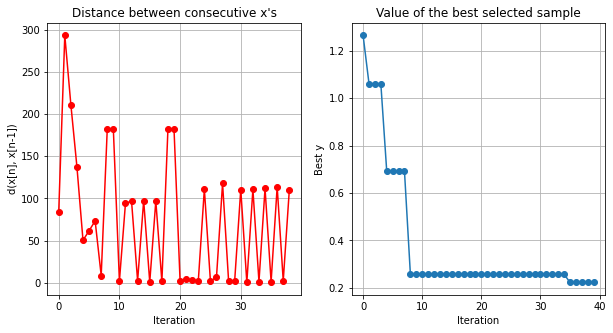

In [ ]:
inicio = time.time()

opt_resnet = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata= 20, Initial_design_numdata='latin')
BayesianOpt = opt_resnet.run_optimization(max_iter=30)
opt_resnet.save_evaluations("ev_filemaxHyper")

print("""
Optimized Parameters:
\t{0}:\t{1}
\t{2}:\t{3}
\t{4}:\t{5}
\t{6}:\t{7}
\t{8}:\t{9}
\t{10}:\t{11}
\t{12}:\t{13}
\t{14}:\t{15}
\t{16}:\t{17}
\t{18}:\t{19}
""".format(bounds[0]["name"],opt_resnet.x_opt[0],
           bounds[1]["name"],opt_resnet.x_opt[1],
           bounds[2]["name"],opt_resnet.x_opt[2],
           bounds[3]["name"],opt_resnet.x_opt[3],
           bounds[4]["name"],opt_resnet.x_opt[4],
           bounds[5]["name"],opt_resnet.x_opt[5],
           bounds[6]["name"],opt_resnet.x_opt[6],
           bounds[7]["name"],opt_resnet.x_opt[7],
           bounds[8]["name"],opt_resnet.x_opt[8],
           bounds[9]["name"],opt_resnet.x_opt[9]))
print("optimized loss: {0}".format(opt_resnet.fx_opt))

fin = time.time()
print(fin-inicio)
opt_resnet.plot_convergence(BayesianOpt)

# Bayesian Optimization (Adjusted Bounds)

> Bounds:
*   Rotation: 68.28 degrees – 240.41 degrees 
*   Zoom: 0.34 – 0.37 
*   Width shift: 0.19 – 0.35 
*   Height Shift: -0.13 – 0.15 
*   Horizontal Flip: True (1) – False (0)
*   Vertical Flip: True (1) - False (0) 
*   Learning Rate: 0.0003,0.00025499994606093326
*   Batch Size: 2, 3 
*   Kernel Size: 1,3 
*   Epochs: 200-300 

Minimized loss: 0.10662011057138443 

In [ ]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: 
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2), 
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out


In [ ]:

class RESNET(): 
    def __init__(self,
                adam_lr=0.00025499994606093326,
                rotation_range = 64.286432593714,
                zoom_range = 0.34062544049205, 
                width_shift_range=0.35701543762784316,  
                height_shift_range=-0.13225810817769346,  
                horizontal_flip = True,  
                vertical_flip=False,
                batch_size=1, 
                epochs=200,
                kernel_size=3): 

        self.adam_lr = adam_lr 
        self.rotation_range = rotation_range 
        self.zoom_range = zoom_range
        self.width_shift_range=width_shift_range 
        self.height_shift_range=height_shift_range
        self.horizontal_flip = horizontal_flip
        self.vertical_flip= vertical_flip  
        self.batch_size = batch_size
        self.epochs = epochs
        self.kernel_size = kernel_size
        self.__datagen = self.data_augmentation()
        self.__model = self.resnet_model()
        

    def residual_block(self, x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: 
        y = Conv2D(kernel_size=kernel_size,
                   strides= (1 if not downsample else 2), 
                   filters=filters,
                   padding="same")(x) 
        y = relu_bn(y)
        y = Conv2D(kernel_size=self.kernel_size,
                   strides=1,
                   filters=filters,
                   padding="same")(y)
                   
        if downsample:
            x = Conv2D(kernel_size=self.kernel_size,
                     strides=2,
                     filters=filters,
                     padding="same")(x)
        out = Add()([x, y])
        out = relu_bn(out)
        return out

    # resnet model
    def resnet_model(self):
        inputs = Input(shape=(224,224, 1))
        num_filters = 64 
        t = BatchNormalization()(inputs)
        t = Conv2D(kernel_size= self.kernel_size , strides= 1, filters=num_filters, padding="same")(t)
        t = relu_bn(t)
        num_blocks_list = [2, 5, 5, 2]
        for i in range(len(num_blocks_list)):
          num_blocks = num_blocks_list[i]
          for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
        t = AveragePooling2D(4)(t)
        t = Flatten()(t)
        outputs = Dense(3, activation='softmax')(t)
    
        model = Model(inputs, outputs)

        model.compile(optimizer=Adam(learning_rate=self.adam_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def data_augmentation(self):
        datagen = ImageDataGenerator(
        rotation_range =self.rotation_range,  
        zoom_range = self.zoom_range, 
        width_shift_range= self.width_shift_range, 
        height_shift_range= self.height_shift_range,  
        horizontal_flip =self.horizontal_flip, 
        vertical_flip=self.vertical_flip) 
        datagen.fit(trainingsetDA)
        return datagen


    def resnet_fit(self):
        early_stopping = EarlyStopping(patience=15, verbose=1,restore_best_weights=True)
        history = self.__model.fit(self.__datagen.flow(trainingsetDA,y_train, batch_size=self.batch_size),
                            epochs=self.epochs,verbose=1, validation_data=(x_val, y_val),
                            callbacks=[early_stopping])
    

    def resnet_evaluate(self):
        self.resnet_fit()
        evaluation = self.__model.evaluate(x_val,y_val, batch_size=self.batch_size, verbose=0)
        return evaluation



In [ ]:
#RUN RESNET CLASS
def run_RESNET (adam_lr=0.00025499994606093326,
                rotation_range = 64.286432593714, 
                zoom_range = 0.34062544049205,
                width_shift_range=0.35701543762784316, 
                height_shift_range=-0.13225810817769346,  
                horizontal_flip = True, 
                vertical_flip=False, 
                batch_size=1, 
                epochs=200,
                kernel_size=3):
               
    _resnet = RESNET(adam_lr = adam_lr,
                     rotation_range = rotation_range,  
                     zoom_range = zoom_range,  
                     width_shift_range=width_shift_range,  
                     height_shift_range=height_shift_range,  
                     horizontal_flip = horizontal_flip,  
                     vertical_flip= vertical_flip,
                     batch_size = batch_size,
                     epochs = epochs,
                     kernel_size = kernel_size)
    resnet_evaluation = _resnet.resnet_evaluate()
    return resnet_evaluation

In [ ]:
bounds = [{'name': 'adam_lr',    'type': 'continuous',    'domain': (0.0003,0.00025499994606093326)},    
          {'name': 'rotation_range',                         'type': 'continuous',    'domain': (64.286432593714, 240.4145242612962)}, 
          {'name': 'zoom_range',                             'type': 'continuous',    'domain': (0.34062544049205,0.3699951353726556)}, 
          {'name': 'width_shift_range',                      'type': 'continuous',    'domain': (0.35701543762784316,0.1909674923332263)},
          {'name': 'height_shift_range',                     'type': 'continuous',    'domain': (-0.13225810817769346,0.15691914435536908)},
          {'name': 'horizontal_flip',                        'type': 'categorical',   'domain': (True, False)},
          {'name': 'vertical_flip',                          'type': 'categorical',   'domain': (True, False)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (2, 3)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (200,250)}, 
          {'name': 'kernel',           'type': 'discrete',    'domain': (1,3)}]

In [ ]:
def f(x):
    print(x)
    evaluation = run_RESNET(
        adam_lr = float(x[:,0]),
        rotation_range = int(x[:,1]),
        zoom_range = float(x[:,2]),
        width_shift_range = float(x[:,3]),
        height_shift_range = float(x[:,4]),
        horizontal_flip = 1, #int(x[:,5]),
        vertical_flip = int(x[:,6]),
        batch_size = int(x[:,7]), 
        epochs = 200, # int(x[:,8]), 
        kernel_size = int(x[:,9]),
        )
    
    print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0], evaluation[1]))
    print(evaluation)
    return evaluation[0]

Streaming output truncated to the last 5000 lines.
Epoch 41/200
98/98 [==============================] - 6s 62ms/step - loss: 0.7900 - accuracy: 0.6478 - val_loss: 0.6166 - val_accuracy: 0.7460
Epoch 42/200
98/98 [==============================] - 6s 62ms/step - loss: 0.6578 - accuracy: 0.7204 - val_loss: 1.1139 - val_accuracy: 0.6032
Epoch 43/200
98/98 [==============================] - 6s 62ms/step - loss: 0.6501 - accuracy: 0.6705 - val_loss: 0.6390 - val_accuracy: 0.6984
Epoch 44/200
98/98 [==============================] - 6s 63ms/step - loss: 0.7213 - accuracy: 0.6985 - val_loss: 0.7094 - val_accuracy: 0.6667
Epoch 45/200
98/98 [==============================] - 6s 62ms/step - loss: 0.8198 - accuracy: 0.6260 - val_loss: 0.3146 - val_accuracy: 0.8889
Epoch 46/200
98/98 [==============================] - 6s 62ms/step - loss: 0.7853 - accuracy: 0.6175 - val_loss: 0.5185 - val_accuracy: 0.7460
Epoch 47/200
98/98 [==============================] - 6s 62ms/step - loss: 0.7722 - accurac

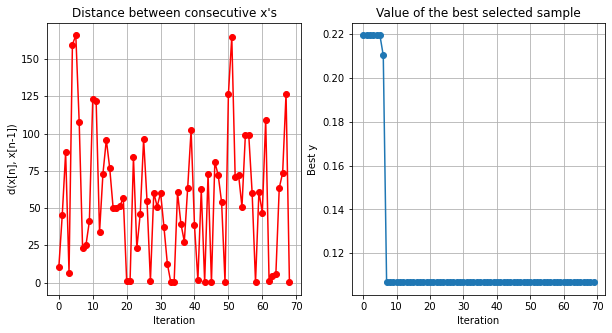

In [ ]:
inicio = time.time()

opt_resnet = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata= 20, Initial_design_numdata='latin')
BayesianOpt = opt_resnet.run_optimization(max_iter=50)
opt_resnet.save_evaluations("ev_file_adjusted_bounds")

print("""
Optimized Parameters:
\t{0}:\t{1}
\t{2}:\t{3}
\t{4}:\t{5}
\t{6}:\t{7}
\t{8}:\t{9}
\t{10}:\t{11}
\t{12}:\t{13}
\t{14}:\t{15}
\t{16}:\t{17}
\t{18}:\t{19}
""".format(bounds[0]["name"],opt_resnet.x_opt[0],
           bounds[1]["name"],opt_resnet.x_opt[1],
           bounds[2]["name"],opt_resnet.x_opt[2],
           bounds[3]["name"],opt_resnet.x_opt[3],
           bounds[4]["name"],opt_resnet.x_opt[4],
           bounds[5]["name"],opt_resnet.x_opt[5],
           bounds[6]["name"],opt_resnet.x_opt[6],
           bounds[7]["name"],opt_resnet.x_opt[7],
           bounds[8]["name"],opt_resnet.x_opt[8],
           bounds[9]["name"],opt_resnet.x_opt[9]))
print("optimized loss: {0}".format(opt_resnet.fx_opt))

fin = time.time()
print(fin-inicio)
opt_resnet.plot_convergence(BayesianOpt)

# Bayesian Optimization (Adjusted Bounds+)


This experiment was not included in the research, it was  carried out for experimentation purposes with the model. However feel free to watch the results. 

Minimized loss: 0.04966915398836136 


In [ ]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: 
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x) 
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out
    

In [ ]:

class RESNET(): 
    def __init__(self,
                adam_lr=0.00025499994606093326,
                rotation_range = 180,
                zoom_range = 0.34062544049205, 
                width_shift_range=-0.1,
                height_shift_range=-0.13225810817769346,  
                horizontal_flip = True,
                vertical_flip=False,
                batch_size=3, 
                epochs=200,
                kernel_size=1): 

        self.adam_lr = adam_lr 
        self.rotation_range = rotation_range 
        self.zoom_range = zoom_range
        self.width_shift_range=width_shift_range 
        self.height_shift_range=height_shift_range
        self.horizontal_flip = horizontal_flip
        self.vertical_flip= vertical_flip  
        self.batch_size = batch_size
        self.epochs = epochs
        self.kernel_size = kernel_size
        self.__datagen = self.data_augmentation()
        self.__model = self.resnet_model()
        
      
    def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: 

        y = Conv2D(kernel_size=self.kernel_size,
                   strides= (1 if not downsample else 2),
                   filters=filters,
                   padding="same")(x) #
        y = relu_bn(y)
        y = Conv2D(kernel_size=self.kernel_size,
                   strides=1,
                   filters=filters,
                   padding="same")(y)
                   
        if downsample:
            x = Conv2D(kernel_size=1,
                     strides=2,
                     filters=filters,
                     padding="same")(x)
        out = Add()([x, y])
        out = relu_bn(out)
        return out

    def resnet_model(self):
        inputs = Input(shape=(224,224, 1))
        num_filters = 64 
        t = BatchNormalization()(inputs)
        t = Conv2D(kernel_size= self.kernel_size , strides= 1, filters=num_filters, padding="same")(t)
        t = relu_bn(t)
        num_blocks_list = [2, 5, 5, 2]
        for i in range(len(num_blocks_list)):
          num_blocks = num_blocks_list[i]
          for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
        t = AveragePooling2D(4)(t)
        t = Flatten()(t)
        outputs = Dense(3, activation='softmax')(t)
    
        model = Model(inputs, outputs)

        model.compile(optimizer=Adam(learning_rate=self.adam_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def data_augmentation(self):
        datagen = ImageDataGenerator(
        rotation_range =self.rotation_range, 
        zoom_range = self.zoom_range, 
        width_shift_range= self.width_shift_range, 
        height_shift_range= self.height_shift_range,  
        horizontal_flip =self.horizontal_flip,  
        vertical_flip=self.vertical_flip)  
        datagen.fit(trainingsetDA)
        return datagen


    def resnet_fit(self):
        early_stopping = EarlyStopping(patience=25, verbose=1,restore_best_weights=True)
        history = self.__model.fit(self.__datagen.flow(trainingsetDA,y_train, batch_size=self.batch_size),
                            epochs=self.epochs,verbose=1, validation_data=(x_val, y_val),
                            callbacks=[early_stopping])
    

    def resnet_evaluate(self):
        self.resnet_fit()
        evaluation = self.__model.evaluate(x_val,y_val, batch_size=self.batch_size, verbose=0)
        return evaluation



In [ ]:
def run_RESNET (adam_lr=0.0002587553425186625,
                rotation_range = 180,  
                zoom_range = 0.34062544049205, 
                width_shift_range= -0.1, 
                height_shift_range=-0.13225810817769346,  
                horizontal_flip = True,  # randomly flip images
                vertical_flip=False, # randomly flip images
                batch_size=3, 
                epochs=200,
                kernel_size=1):
               
    _resnet = RESNET(adam_lr = adam_lr,
                     rotation_range = rotation_range,  
                     zoom_range = zoom_range,  
                     width_shift_range=width_shift_range,  
                     height_shift_range=height_shift_range,  
                     horizontal_flip = horizontal_flip,  
                     vertical_flip= vertical_flip,
                     batch_size = batch_size,
                     epochs = epochs,
                     kernel_size = kernel_size)
    resnet_evaluation = _resnet.resnet_evaluate()
    return resnet_evaluation

In [ ]:
#======================================================
#MODEL BOUNDS
#======================================================
bounds = [{'name': 'adam_lr',    'type': 'continuous',    'domain': (0.0002587553425186625,0.00015)},  
          {'name': 'rotation_range',                         'type': 'continuous',    'domain': (150,200)}, 
          {'name': 'zoom_range',                             'type': 'continuous',    'domain': (0.34,0.37)}, 
          {'name': 'width_shift_range',                      'type': 'continuous',    'domain': (-0.19,0.25)},
          {'name': 'height_shift_range',                     'type': 'continuous',    'domain': (-0.15,0)},
          {'name': 'horizontal_flip',                        'type': 'categorical',   'domain': (True, False)},
          {'name': 'vertical_flip',                          'type': 'categorical',   'domain': (True, False)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (2, 3)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (200,250)}, 
          {'name': 'kernel',           'type': 'discrete',    'domain': (1,3)}]

In [ ]:
def f(x):
    print(x)
    evaluation = run_RESNET(
        adam_lr = float(x[:,0]),
        rotation_range = int(x[:,1]),
        zoom_range = float(x[:,2]),
        width_shift_range = float(x[:,3]),
        height_shift_range = float(x[:,4]),
        horizontal_flip = 1, #int(x[:,5]),
        vertical_flip = 0, #int(x[:,6]),
        batch_size = int(x[:,7]), 
        epochs = 200, # int(x[:,8]), 
        kernel_size = int(x[:,9]),
        )
    
    print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0], evaluation[1]))
    print(evaluation)
    return evaluation[0]

Streaming output truncated to the last 5000 lines.
Epoch 1/200
147/147 [==============================] - 10s 47ms/step - loss: 1.1380 - accuracy: 0.4011 - val_loss: 1.7858 - val_accuracy: 0.3175
Epoch 2/200
147/147 [==============================] - 6s 43ms/step - loss: 1.1262 - accuracy: 0.4111 - val_loss: 1.5003 - val_accuracy: 0.3492
Epoch 3/200
147/147 [==============================] - 6s 43ms/step - loss: 1.0306 - accuracy: 0.5176 - val_loss: 0.5737 - val_accuracy: 0.8413
Epoch 4/200
147/147 [==============================] - 6s 43ms/step - loss: 0.9696 - accuracy: 0.5650 - val_loss: 1.2297 - val_accuracy: 0.5556
Epoch 5/200
147/147 [==============================] - 6s 43ms/step - loss: 0.9283 - accuracy: 0.5965 - val_loss: 0.5098 - val_accuracy: 0.8254
Epoch 6/200
147/147 [==============================] - 6s 43ms/step - loss: 0.8352 - accuracy: 0.6336 - val_loss: 2.6828 - val_accuracy: 0.5714
Epoch 7/200
147/147 [==============================] - 6s 43ms/step - loss: 0.9229 -

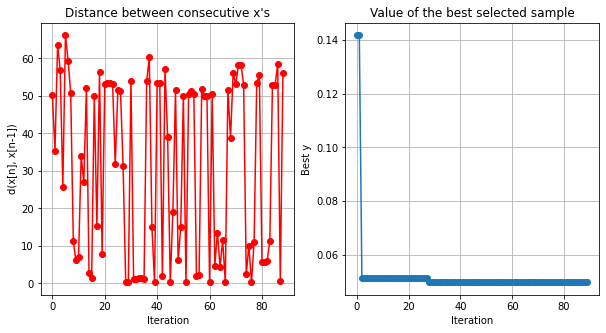

In [ ]:
inicio = time.time()


opt_resnet = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata= 20, Initial_design_numdata='latin')
BayesianOpt = opt_resnet.run_optimization(max_iter=70)
opt_resnet.save_evaluations("ev_file_adjusted_boundsv2")


print("""
Optimized Parameters:
\t{0}:\t{1}
\t{2}:\t{3}
\t{4}:\t{5}
\t{6}:\t{7}
\t{8}:\t{9}
\t{10}:\t{11}
\t{12}:\t{13}
\t{14}:\t{15}
\t{16}:\t{17}
\t{18}:\t{19}
""".format(bounds[0]["name"],opt_resnet.x_opt[0],
           bounds[1]["name"],opt_resnet.x_opt[1],
           bounds[2]["name"],opt_resnet.x_opt[2],
           bounds[3]["name"],opt_resnet.x_opt[3],
           bounds[4]["name"],opt_resnet.x_opt[4],
           bounds[5]["name"],opt_resnet.x_opt[5],
           bounds[6]["name"],opt_resnet.x_opt[6],
           bounds[7]["name"],opt_resnet.x_opt[7],
           bounds[8]["name"],opt_resnet.x_opt[8],
           bounds[9]["name"],opt_resnet.x_opt[9]))
print("optimized loss: {0}".format(opt_resnet.fx_opt))

fin = time.time()
print(fin-inicio)
opt_resnet.plot_convergence(BayesianOpt)

# Data augmentation (Optimal Hyperparameters)

rotation_range = 190.7809510335889, 

zoom_range = 0.347686203808678,  

width_shift_range= 0.07712976589332243,  

height_shift_range= -0.04710934652942281, 

horizontal_flip = True,  

vertical_flip=False

adam_lr= 0.0002587553425186625   

batch_size=3                

epochs=300  


In [16]:
#===========================
#TRAINING AND TESTING SHAPES
#===========================

x_train= np.reshape(x_train_normalized, (294, 224, 224,1))
x_test= np.reshape(x_test, (63, 224, 224,1))

#Training
print('x_train set shape>>>>',x_train.shape)
print('y_train set shape>>>>',y_train.shape)

#Testing
print('x_test set shape>>>>',x_test.shape)
print('y_test set shape>>>>',y_test.shape)

x_train set shape>>>> (294, 224, 224, 1)
y_train set shape>>>> (294,)
x_test set shape>>>> (63, 224, 224, 1)
y_test set shape>>>> (63,)


In [17]:
#==========================================================
#DATA AUGMENTATION OPERATIONS WITH OPTIMAL HYPERPARAMETERS 
#==========================================================
datagen = ImageDataGenerator(
        rotation_range = 190.7809510335889, 
        zoom_range = 0.347686203808678,  
        width_shift_range= 0.07712976589332243,  
        height_shift_range= -0.04710934652942281, 
        horizontal_flip = True,  
        vertical_flip=False)  

dgf=datagen.fit(x_train)

#Residual Neural Network (Optimal Hyperparameters)


In [18]:
#### MODEL OPTIMIZED HYPERPARAMETERS #####
adam_lr= 0.0002587553425186625           #
batch_size=3                             #
epochs=300                               #
##########################################


def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: 
    y = Conv2D(kernel_size= 1, 
               strides= (1 if not downsample else 2), 
               filters=filters,
               padding="same")(x) 
    y = relu_bn(y)
    y = Conv2D(kernel_size= 3, 
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out
  

def create_res_net():
    
    inputs = Input(shape=(224,224,1))
    num_filters = 64
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=1,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(3, activation='softmax')(t)
    
    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=adam_lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


    

In [19]:
#=========
#ResNet
#========
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import datetime
import time
inicio = time.time() 

(x_train, y_train), (x_test, y_test) = (x_train,y_train),(x_test, y_test)

model = create_res_net()  #ResNet
model.summary()

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
name = 'RESNET'+timestr 



#######################################MODEL CHECKPOINTS ###########################################################
checkpoint_path = "/content/Weigths"+name+"/_weights.{epoch:02d}-{val_loss:.2f}.hdf5" 
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    filepath= checkpoint_path ,save_weights_only=True, monitor='val_loss',mode='min',
     verbose=0, save_best_only=True  # will show you nothing (silent), solo se almacenan los mejores resultados
)
#####################################################################################################################


tensorboard_callback = TensorBoard(
    log_dir='tensorboard_logs/'+name,
    histogram_freq=1
)


early_stopping = EarlyStopping(patience=200, verbose=1,restore_best_weights=True)
history = model.fit(datagen.flow(
    x=x_train,
    y=y_train, batch_size=batch_size),
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    
    callbacks=[early_stopping, cp_callback, tensorboard_callback]
)
fin = time.time()
print('Compilation time in seconds >>>> ', fin-inicio)    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 1)  4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 128         batch_normalization[0][0]        
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 224, 224, 64) 0           conv2d[0][0]                     
______________________________________________________________________________________________

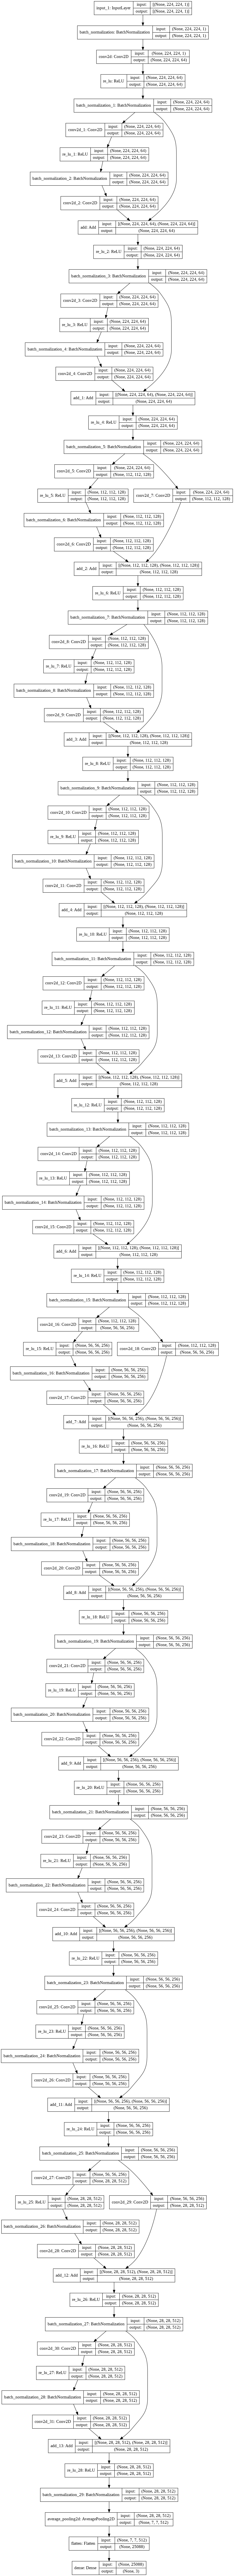

In [20]:
#==============
#ResNet Summary
#==============
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    #show_2type=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
#==========================
#LOADING BEST MODEL WEIGTHS
#==========================
bw_path='/content/WeigthsRESNET20210510-204850/_weights.207-0.19.hdf5'
model.load_weights(bw_path)

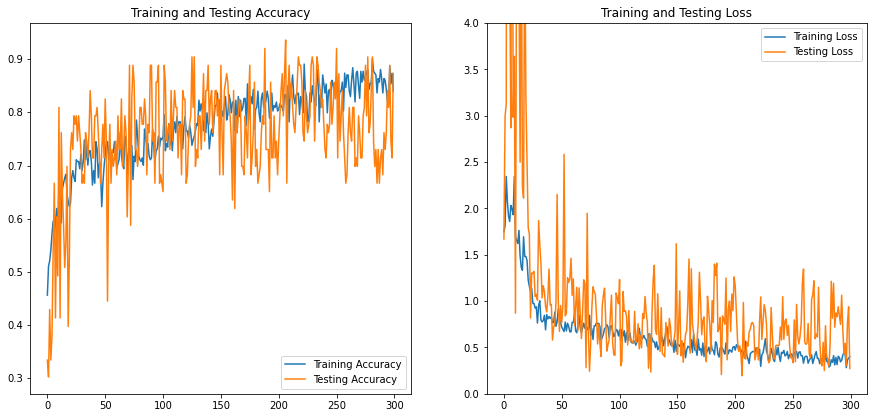

In [ ]:
#==============================
#TRAINING ANS TESTING ACCURACY
#==============================

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')


#==============================
#TRAINING ANS TESTING LOSS
#==============================

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.ylim([0, 4])
plt.show()

In [ ]:
#==============================
#MODEL METRICS
#==============================
predict_prob=model.predict([x_test])
predict_classes=np.argmax(predict_prob,axis=1)
predictions = predict_classes.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Covid (Class 0)','Normal (Class 1)','Pneumonia(Class 2)']))

                    precision    recall  f1-score   support

   Covid (Class 0)       0.84      1.00      0.91        21
  Normal (Class 1)       1.00      1.00      1.00        21
Pneumonia(Class 2)       1.00      0.81      0.89        21

          accuracy                           0.94        63
         macro avg       0.95      0.94      0.94        63
      weighted avg       0.95      0.94      0.94        63



In [ ]:
#==============================
#MODEL PREDICTIONS
#==============================
print(predict_prob.shape)
print(predictions)
print(y_val)

(63, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
